In [1]:
run decentralized_vfi_numba.py

In [2]:
model = create_overborrowing_model()
σ, η, β, ω, κ, R, b_grid, y_nodes, b_size, y_size, Q = model
H = solve_for_equilibrium(model, α=0.1, tol=0.005)

VFI terminated after 125 iterations.
Updated H at iteration 0 with error 0.03147474747474749.
VFI terminated after 125 iterations.
Updated H at iteration 1 with error 0.028410101010101052.
VFI terminated after 125 iterations.
Updated H at iteration 2 with error 0.02632282828282828.
VFI terminated after 125 iterations.
Updated H at iteration 3 with error 0.023840464646464665.
VFI terminated after 125 iterations.
Updated H at iteration 4 with error 0.021539246464646444.
VFI terminated after 125 iterations.
Updated H at iteration 5 with error 0.01938532181818181.
VFI terminated after 125 iterations.
Updated H at iteration 6 with error 0.01765850701010102.


SystemError: CPUDispatcher(<function T at 0x7f2153975620>) returned a result with an exception set

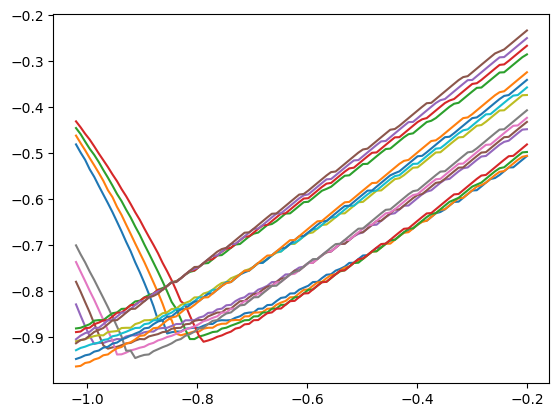

In [11]:
fig, ax = plt.subplots()
for i_y in range(y_size): 
    ax.plot(b_grid, H[:, i_y])
plt.show()

In [18]:
i_y=5
y_t, y_n = y_nodes[i_y]
b_bind = []   # Bp must be greater than constraint
b_max  = []   # Bp must be less than this value to get c >= 0
for i_B, B in enumerate(b_grid):
    Bp = H[i_B, i_y]
    C = R * B + y_t - Bp
    P = ((1 - ω) / ω) * (C / y_n)**(η + 1)
    b_bind.append(- κ * (P * y_n + y_t))
    b_max.append(R * B + y_t)

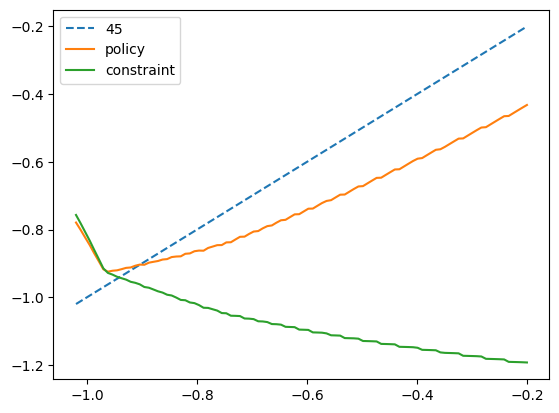

In [20]:
fig, ax = plt.subplots()
ax.plot(b_grid, b_grid, '--', label='45')
ax.plot(b_grid, H[:, i_y], label='policy')
ax.plot(b_grid, b_bind, label='constraint')
#ax.plot(b_grid, b_max, label='max assets')
ax.legend()
plt.show()